In [82]:
import numpy as np 
from numpy import interp

import pickle
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from pprint import pprint
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve,auc

In [3]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [84]:
df = pd.read_excel('FinalFinalFinalSheet.xlsx')

In [5]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Sr No',
       'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical', 'SubVertical',
       'City  Location', 'Investors Name', 'InvestmentnType', 'Amount in USD',
       'TierBoolean', 'AmountInUSDBoolean', 'Year', 'Month',
       'OnlineMarketPlaceBoolean', 'EducationBool', 'ServiceInternetBoolean',
       'HealthTechBoolean', 'Quantile Rank', 'Number_Investors',
       'tryColumnForInvestment', 'Reached_Series_A'],
      dtype='object')

In [6]:
working_df = df[df['Industry Vertical'].notna() & df["Startup Name"].notna() & df['Amount in USD'].notna()]

In [7]:
working_df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,...,Year,Month,OnlineMarketPlaceBoolean,EducationBool,ServiceInternetBoolean,HealthTechBoolean,Quantile Rank,Number_Investors,tryColumnForInvestment,Reached_Series_A
0,0,0,0,1,2020-01-09,BYJU’S,Edtech,E-learning,Bengaluru,Tiger Global Management,...,2020,1,False,False,False,False,9,1,Private Equity,False
1,1,1,1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,...,2020,1,False,False,False,False,7,1,Series C,False
2,2,2,2,3,2020-01-09,Mamaearth,eCommerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,...,2020,1,False,False,False,False,8,1,Series B,False
3,3,3,3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,...,2020,1,False,False,False,False,5,1,Pre-series A,True
4,4,4,4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,...,2020,1,False,False,False,False,5,1,Seed Funding,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934,1934,1934,1934,2868,2015-04-29,Icertis,Advertising,NaN,Pune / US,"Greycroft Partners, Fidelity Growth Partners",...,2015,4,False,False,False,False,6,2,Series A,True
1935,1935,1935,1935,2869,2015-04-29,Tracxn,Startup Analytics platform,NaN,Bengaluru,SAIF Partners,...,2015,4,False,False,False,False,6,1,Series A,True
1936,1936,1936,1936,2871,2015-04-29,Tradelab,Financial Markets Software,NaN,Bengaluru,Rainmatter,...,2015,4,False,False,False,False,2,1,Seed Funding,False
1937,1937,1937,1937,2872,2015-04-29,PiQube,Hiring Analytics platform,NaN,Chennai,The HR Fund,...,2015,4,False,False,False,False,2,1,Seed Funding,False


In [8]:
working_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Sr No',
       'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical', 'SubVertical',
       'City  Location', 'Investors Name', 'InvestmentnType', 'Amount in USD',
       'TierBoolean', 'AmountInUSDBoolean', 'Year', 'Month',
       'OnlineMarketPlaceBoolean', 'EducationBool', 'ServiceInternetBoolean',
       'HealthTechBoolean', 'Quantile Rank', 'Number_Investors',
       'tryColumnForInvestment', 'Reached_Series_A'],
      dtype='object')

In [9]:
working_df.drop('Unnamed: 0',axis = 1, inplace = True)
working_df.drop('Unnamed: 0.1',axis = 1, inplace = True)

c:\users\ayush\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
working_df['tryColumnForInvestment'].value_counts()

Seed Funding                   559
Series A                       448
Pre-series A                   312
Series C                       201
Series B                       172
Seed Angel Funding              76
Series D                        49
Private Equity                  35
Debt Funding                    20
Series C                        14
Series D                        12
Angel   Seed Funding             4
Seed                             3
Venture Round                    2
Seed  Angel Funding              2
pre-Series A                     2
Pre-Series A                     2
Series F                         2
Series E                         2
Single Venture                   1
Debt-Funding                     1
Term Loan                        1
Structured Debt                  1
Private                          1
Series G                         1
Private Funding                  1
Equity Based Funding             1
Series B (Extension)             1
Equity              

In [11]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1939 entries, 0 to 1938
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0.1.1            1939 non-null   int64         
 1   Sr No                     1939 non-null   int64         
 2   Date dd/mm/yyyy           1939 non-null   datetime64[ns]
 3   Startup Name              1939 non-null   object        
 4   Industry Vertical         1939 non-null   object        
 5   SubVertical               1470 non-null   object        
 6   City  Location            1935 non-null   object        
 7   Investors Name            1919 non-null   object        
 8   InvestmentnType           1938 non-null   object        
 9   Amount in USD             1939 non-null   int64         
 10  TierBoolean               1939 non-null   bool          
 11  AmountInUSDBoolean        1939 non-null   bool          
 12  Year                

In [12]:
working_df['Reached_Series_A'] = (working_df['tryColumnForInvestment']=="Series A")| (working_df['Amount in USD'].between(1250000,7000000))

<ipython-input-12-4cb34d8320ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df['Reached_Series_A'] = (working_df['tryColumnForInvestment']=="Series A")| (working_df['Amount in USD'].between(1250000,7000000))


In [13]:
working_df['Reached_Series_B'] = (working_df['tryColumnForInvestment']=="Series B") | (working_df['Amount in USD'].between(7000001,15000000))

<ipython-input-13-b07087bd7aba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df['Reached_Series_B'] = (working_df['tryColumnForInvestment']=="Series B") | (working_df['Amount in USD'].between(7000001,15000000))


In [14]:
working_df['Reached_Series_B'].replace(True,1,inplace =True)
working_df['Reached_Series_B'].replace(False,0,inplace =True)

c:\users\ayush\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [15]:
import datetime

x = datetime.datetime(2020, 5, 1)

print(x)

def year_estd(date):
    now = datetime.datetime(2022,8,14,0,0,0,0)
    diff = now - date
    return (diff.days/365)

2020-05-01 00:00:00


In [16]:
working_df['Time'] = working_df['Date dd/mm/yyyy'].apply(lambda row: year_estd(row))

<ipython-input-16-4d2bfd198cf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df['Time'] = working_df['Date dd/mm/yyyy'].apply(lambda row: year_estd(row))


In [17]:
working_df['annual_raised'] = working_df['Amount in USD']/working_df['Time']

<ipython-input-17-93cb9144a2e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df['annual_raised'] = working_df['Amount in USD']/working_df['Time']


# Goal Definition : Reach Series A ( raise upto 7M)

In [18]:
working_df['Reached_Series_A'].replace(True,1,inplace =True)

In [19]:
working_df['Reached_Series_A'].replace(False,0,inplace = True)

In [20]:
working_df['Reached_Series_A']

0       0
1       0
2       0
3       1
4       1
       ..
1934    1
1935    1
1936    0
1937    0
1938    0
Name: Reached_Series_A, Length: 1939, dtype: int64

## One Hot Encoding

In [21]:
seed = working_df[(working_df['tryColumnForInvestment']=='Seed Funding') | (working_df['tryColumnForInvestment']=='Pre-series A') |(working_df['tryColumnForInvestment']=='Seed Angel Funding')]
seed_y = seed['Reached_Series_A']

In [22]:
seed_y.shape

(947,)

In [23]:
seriesA = working_df[(working_df["InvestmentnType"]=="Series A")]
seriesA_y = seriesA['Reached_Series_B']

In [24]:
def one_hot(dataframe, nominal):
    gen_onehot_features = pd.get_dummies(dataframe[nominal])
    result = pd.concat([dataframe, gen_onehot_features],axis=1)
    result.drop([nominal],axis=1,inplace=True)
    result.drop(result.columns[(result == 0).sum() > 0.995*result.shape[0]], axis = 1, inplace = True) 

    return result

In [25]:
def one_hot_market(dataframe):
    gen_onehot_features = pd.get_dummies(dataframe['InvestmentnType'])
    result = pd.concat([dataframe, gen_onehot_features],axis=1)
    result.drop(['InvestmentnType'],axis=1,inplace=True)
#     print(result.columns[(result == 0).sum() > 0.995*result.shape[0]])
    result.drop(result.columns[(result == 0).sum() > 0.995*result.shape[0]], axis = 1, inplace = True) 

    return result

def one_hot_location(dataframe):
    gen_onehot_features = pd.get_dummies(dataframe['City Location'])
    result = pd.concat([dataframe, gen_onehot_features],axis=1)
    result.drop(['City Location'],axis=1,inplace=True)
    result.drop(result.columns[(result == 0).sum() > 0.995*result.shape[0]], axis = 1, inplace = True) 

    return result

In [26]:
seed_x = one_hot(one_hot(seed[['City  Location',"Time",'Industry Vertical']],'City  Location'),'Industry Vertical')

In [27]:
seriesA_x = one_hot(one_hot(seriesA[['City  Location',"Time",'Industry Vertical']],'City  Location'),'Industry Vertical')

In [28]:
for i in [seed_x,seed_y,seriesA_x,seriesA_y]:
    print(i.shape)

(947, 34)
(947,)
(22, 29)
(22,)


In [29]:
for i in [seed_x,seed_y,seriesA_x,seriesA_y]:
    print(i.shape)

(947, 34)
(947,)
(22, 29)
(22,)


In [30]:
seriesA_x

,Time,Bengaluru,Bengaluru and Gurugram,Burnsville,Chennai,Gurugram,Haryana,India/US,Mumbai,Mumbai/Bengaluru,...,Health Care,IoT,Logistics,Luxury Label,Nanotechnology,"SaaS, Ecommerce",Services,Software,Technology,eCommerce
5,2.586301,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,2.673973,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2.945205,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
37,2.945205,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
39,2.945205,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
41,2.947945,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,3.038356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,3.098630,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
69,3.101370,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
73,3.200000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
rs = 1 

In [32]:
seed_x_train, seed_x_test, seed_y_train, seed_y_test = train_test_split(seed_x, 
                                                                        seed_y, 
                                                                        test_size=0.2,
                                                                        random_state=rs)

In [33]:
seriesA_x_train, seriesA_x_test, seriesA_y_train, seriesA_y_test = train_test_split(seriesA_x, 
                                                                                    seriesA_y, 
                                                                                    test_size=0.2, 
                                                                                    random_state=rs)

# Data Resampling 

In [34]:
def split_downsample(X,y):
    var= y.name
    #split data into test and training sets
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33)
    #combine them back for resampling
    train_data = pd.concat([X_train, y_train], axis=1)
    # separate minority and majority classes
    negative = train_data[train_data[var]==0]
    positive = train_data[train_data[var]==1]

    # downsample majority
    neg_downsampled = resample(negative,
        replace=True, # sample with replacement
        n_samples=len(positive), # match number in minority class
        ) # reproducible results
    
    
    # combine majority and upsampled minority
    upsampled = pd.concat([neg_downsampled, positive])
    # check new class counts
    
    new_X_train = upsampled.drop(var,axis=1)
    new_y_train = upsampled[var]
    
    return new_X_train, X_test, new_y_train, y_test

In [35]:
def downsample(X,y,rs=None):
    var= y.name
    
    joint = pd.concat([X, y], axis=1)
    negative = joint[joint[var]==0]
    positive = joint[joint[var]==1]

    # downsample majority
    neg_downsampled = resample(negative,
        replace=True, # sample with replacement
        n_samples=len(positive), # match number in minority class
        random_state = rs) # reproducible results
    
    
    # combine majority and upsampled minority
    upsampled = pd.concat([neg_downsampled, positive])
    # check new class counts
    
    new_X = upsampled.drop(var,axis=1)
    new_y = upsampled[var]
    
    return new_X, new_y

In [36]:
downsample(seed_x_train,seed_y_train)[1].value_counts()

0    43
1    43
Name: Reached_Series_A, dtype: int64

In [37]:
def downsample_split(X,y):
    var= y.name
    #combine them for resampling
    train_data = pd.concat([X, y], axis=1)
    # separate minority and majority classes
    negative = train_data[train_data[var]==0]
    positive = train_data[train_data[var]==1]

    # downsample majority
    neg_downsampled = resample(negative,
        replace=True, # sample with replacement
        n_samples=len(positive), # match number in minority class
        ) # reproducible results
    
    
    # combine majority and upsampled minority
    upsampled = pd.concat([neg_downsampled, positive])
    
    X_train, X_test, y_train, y_test = train_test_split( 
        upsampled.drop(var,axis=1), upsampled[var], stratify=upsampled[var],
        test_size=0.33,)
    
    # check new class counts
#     print(y_train.value_counts())

    return X_train, X_test, y_train, y_test

### Training set variable selection(Logistic Regression p-value)

In [38]:
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif, SelectKBest

In [39]:
def get_feat(method, k, x, y):
    select = SelectKBest(method, k)
    _ = select.fit_transform(x, y)
    return [x.columns[i] for i, val in enumerate(select.get_support()) if val] 

In [40]:
num_features = 7

### Seed 

In [41]:
mutual_seed = get_feat(mutual_info_classif, num_features, seed_x_train, seed_y_train)

In [42]:
chi2_seed = get_feat(chi2, num_features, seed_x_train, seed_y_train)

In [43]:
f_seed = get_feat(f_classif, num_features, seed_x_train, seed_y_train)

In [44]:
chi2_seed == f_seed

True

### Series A

In [45]:
mutual_seriesA = get_feat(mutual_info_classif, 10, seriesA_x_train, seriesA_y_train)

In [46]:
chi2_seriesA = get_feat(chi2, num_features, seriesA_x_train, seriesA_y_train)

In [47]:
f_seriesA = get_feat(f_classif, num_features, seriesA_x_train, seriesA_y_train)

c:\users\ayush\appdata\local\programs\python\python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 3 11 17 18 20 23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
c:\users\ayush\appdata\local\programs\python\python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [48]:
chi2_seriesA == f_seriesA


False

In [49]:
import statsmodels.api as sm

def logiVarSelect(x, y, sig_lvl, columns):
    while True:
        logi = sm.Logit(y, x).fit(method='bfgs',maxiter=1000) # The maxiter is increased to help convergence for seed
        maxP = max(logi.pvalues)
        if maxP > sig_lvl:
            loc = list(logi.pvalues).index(maxP)
            x = np.delete(x, loc, 1)
            columns = np.delete(columns, loc)
        else: 
            return columns

In [50]:
selected_columns_seed = seed_x_train.columns.values
selected_columns_seriesA = seriesA_x_train.columns.values

SL = 0.05

In [51]:
p_seed = logiVarSelect(seed_x_train.values, seed_y_train.values, SL, selected_columns_seed)

Optimization terminated successfully.
         Current function value: 0.172674
         Iterations: 226
         Function evaluations: 230
         Gradient evaluations: 230
Optimization terminated successfully.
         Current function value: 0.174390
         Iterations: 202
         Function evaluations: 206
         Gradient evaluations: 206
Optimization terminated successfully.
         Current function value: 0.175802
         Iterations: 202
         Function evaluations: 206
         Gradient evaluations: 206
Optimization terminated successfully.
         Current function value: 0.177384
         Iterations: 221
         Function evaluations: 225
         Gradient evaluations: 225
Optimization terminated successfully.
         Current function value: 0.178037
         Iterations: 201
         Function evaluations: 205
         Gradient evaluations: 205
Optimization terminated successfully.
         Current function value: 0.178759
         Iterations: 210
         Function ev

In [52]:
p_seriesA = logiVarSelect(seriesA_x_train.values, seriesA_y_train.values, SL, selected_columns_seriesA)

Optimization terminated successfully.
         Current function value: 0.000004
         Iterations: 79
         Function evaluations: 83
         Gradient evaluations: 83


c:\users\ayush\appdata\local\programs\python\python39\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\users\ayush\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [53]:
p_seed

array(['Time', 'IT'], dtype=object)

In [54]:
p_seriesA

array(['Time', 'Bengaluru', 'Bengaluru and Gurugram', 'Burnsville',
       'Chennai', 'Gurugram', 'Haryana', 'India/US', 'Mumbai',
       'Mumbai/Bengaluru', 'New Delhi', 'New York, Bengaluru', 'Pune',
       'Energy', 'FinTech', 'Finance', 'Financial Tech', 'Food Tech',
       'Gaming', 'Health Care', 'IoT', 'Logistics', 'Luxury Label',
       'Nanotechnology', 'SaaS, Ecommerce', 'Services', 'Software',
       'Technology', 'eCommerce'], dtype=object)

In [55]:
pd.set_option('display.max_colwidth', None)

data = [['P-value', p_seed],
['Chi Squared/F-value', chi2_seed],
['Mutual information', mutual_seed],
]
df = pd.DataFrame(data, columns = ['Selection Method', 'Seed Selected Variables']) 
df

,Selection Method,Seed Selected Variables
0,P-value,"[Time, IT]"
1,Chi Squared/F-value,"[Time, Chennai, Gurgaon, Consumer Internet, Ed-Tech, IT, Technology ]"
2,Mutual information,"[Time, Goa, Gurgaon, Gurugram, Consumer Internet, Technology, Transportation ]"


In [56]:
data = [['P-value', p_seriesA],
['Chi Squared/F-value', chi2_seriesA],
['Mutual information', mutual_seriesA],
]
df = pd.DataFrame(data, columns = ['Selection Method', 'SeriesA Selected Variables']) 
df

,Selection Method,SeriesA Selected Variables
0,P-value,"[Time, Bengaluru, Bengaluru and Gurugram, Burnsville, Chennai, Gurugram, Haryana, India/US, Mumbai, Mumbai/Bengaluru, New Delhi, New York, Bengaluru, Pune, Energy, FinTech, Finance, Financial Tech, Food Tech, Gaming, Health Care, IoT, Logistics, Luxury Label, Nanotechnology, SaaS, Ecommerce, Services, Software, Technology, eCommerce]"
1,Chi Squared/F-value,"[Bengaluru, Chennai, New Delhi, FinTech, Finance, Logistics, Technology]"
2,Mutual information,"[Bengaluru and Gurugram, Chennai, Financial Tech, Food Tech, Gaming, Logistics, Nanotechnology, Services, Technology, eCommerce]"


In [100]:
len(p_seriesA)

29

In [57]:
colors=['red','darkorange','royalblue','blueviolet']

In [58]:
def scikit_logi(X,y,samplemethod):
    # Splits x,y into testing and validation sets, and return the fpr and tpr of the validation set 
    X_train, X_test, y_train, y_test = samplemethod(X, y)
    logi = LogisticRegression(solver='lbfgs',max_iter=400)
    model = logi.fit(X_train,y_train)
    y_pred_proba = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:,1])
    return (fpr, tpr)

In [59]:
def logi_plot_roc(x,y,c,show_detail=False,txtlabel=""):
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []
    for i in range(100):
        fpr_R_seed_sel, tpr_R_seed_sel = scikit_logi(x,y, split_downsample)
        if show_detail == True:
            plt.plot(fpr_R_seed_sel, tpr_R_seed_sel, lw=0.1, color = c, alpha=0.6)

        interp_tpr = interp(mean_fpr, fpr_R_seed_sel, tpr_R_seed_sel)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(auc(fpr_R_seed_sel,tpr_R_seed_sel))

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color=c,
            label=txtlabel+ r' Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (mean_auc, std_auc),
            lw=2, alpha=0.8)

    if show_detail == True:
        std_tpr = np.std(tprs, axis=0)
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
        plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color="grey", alpha=.3,
                        label=r'$\pm$ 1 std. dev.')
    return(mean_fpr, mean_tpr, mean_auc, std_auc)

In [60]:
def label():
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")

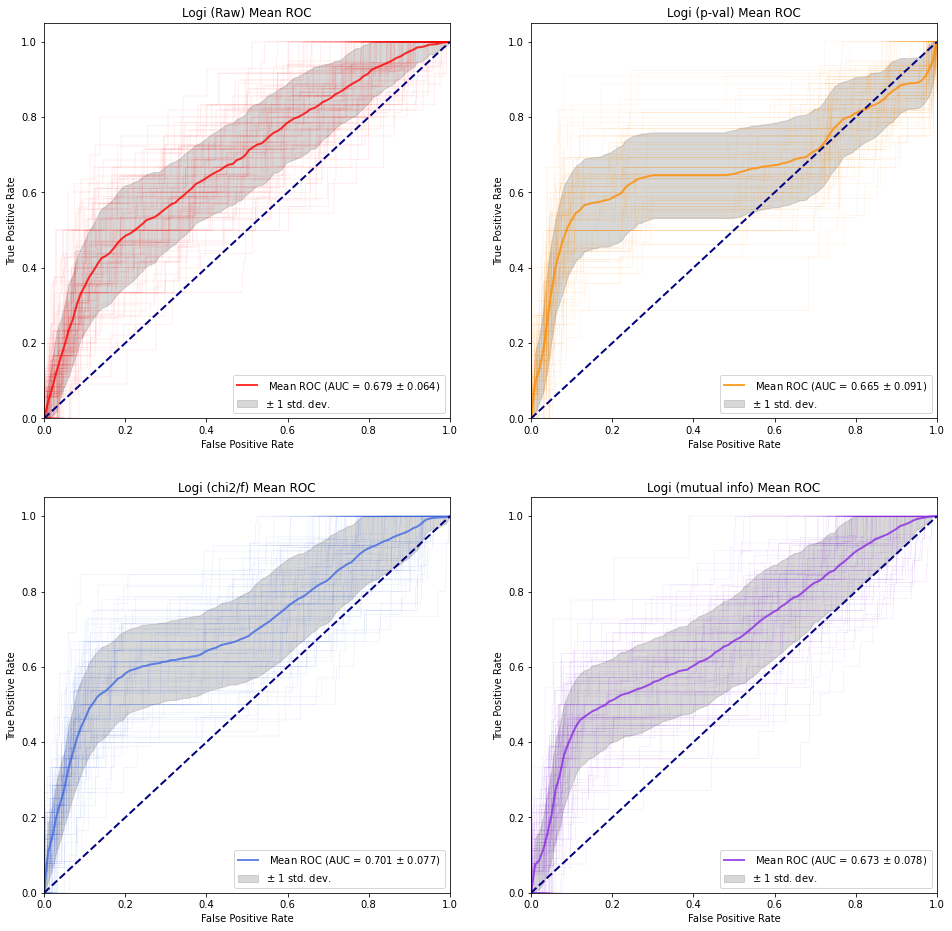

In [61]:
fig = plt.figure(figsize=(16,16))
fig.subplots_adjust(hspace=0.2, wspace=0.2)


ax = fig.add_subplot(2, 2, 1)
c1_mean_fpr, c1_mean_tpr, c1_mean_auc, c1_std_auc = logi_plot_roc(seed_x_train,seed_y_train,colors[0],show_detail=True)
label()
plt.title("Logi (Raw) Mean ROC")

ax = fig.add_subplot(2, 2, 2)
c2_mean_fpr, c2_mean_tpr, c2_mean_auc, c2_std_auc = logi_plot_roc(seed_x_train[p_seed],seed_y_train,colors[1],show_detail=True)
label()
plt.title("Logi (p-val) Mean ROC")

ax = fig.add_subplot(2, 2, 3)
c3_mean_fpr, c3_mean_tpr, c3_mean_auc, c3_std_auc = logi_plot_roc(seed_x_train[chi2_seed],seed_y_train,colors[2],show_detail=True)
label()
plt.title("Logi (chi2/f) Mean ROC")

ax = fig.add_subplot(2, 2, 4)
c4_mean_fpr, c4_mean_tpr, c4_mean_auc, c4_std_auc = logi_plot_roc(seed_x_train[mutual_seed],seed_y_train,colors[3],show_detail=True)
label()
plt.title("Logi (mutual info) Mean ROC")
plt.savefig('seed_4x.png')


plt.show()

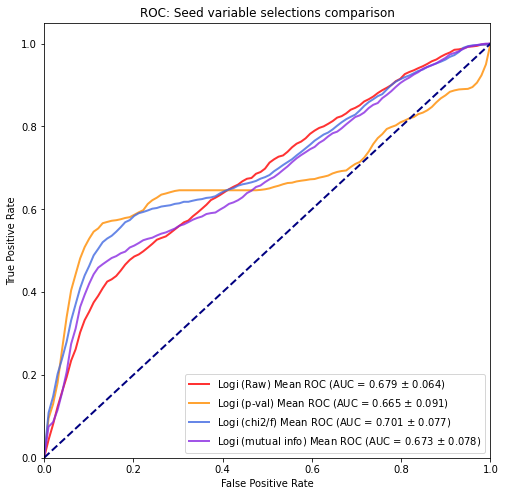

In [62]:
fig = plt.figure(figsize=(8,8))

plt.plot(c1_mean_fpr, c1_mean_tpr, color=colors[0], label="Logi (Raw)"+ r' Mean ROC (AUC = %0.3f $\pm$ %0.3f)' 
         % (c1_mean_auc, c1_std_auc), lw=2, alpha=0.8)
plt.plot(c2_mean_fpr, c2_mean_tpr, color=colors[1], label="Logi (p-val)"+ r' Mean ROC (AUC = %0.3f $\pm$ %0.3f)' 
         % (c2_mean_auc, c2_std_auc), lw=2, alpha=0.8)
plt.plot(c3_mean_fpr, c3_mean_tpr, color=colors[2], label="Logi (chi2/f)"+ r' Mean ROC (AUC = %0.3f $\pm$ %0.3f)' 
         % (c3_mean_auc, c3_std_auc), lw=2, alpha=0.8)
plt.plot(c4_mean_fpr, c4_mean_tpr, color=colors[3], label="Logi (mutual info)"+ r' Mean ROC (AUC = %0.3f $\pm$ %0.3f)' 
         % (c4_mean_auc, c4_std_auc), lw=2, alpha=0.8)

label()

plt.title("ROC: Seed variable selections comparison")
plt.savefig('seed_all.png')


plt.show()

In [63]:
def test_results(x_train, y_train, x_test, y_test):
    x_train, y_train = downsample(x_train, y_train,rs)
    logi = LogisticRegression(solver='lbfgs',max_iter=400)
    logi.fit(x_train, y_train)
    acc = logi.score(x_test, y_test)
    y_pred = logi.predict(x_test)
    cm = confusion_matrix(y_test, y_pred,labels=[1, 0])
    tpr = cm[0][0]/np.sum(cm[0])
    tnr = cm[1][1]/np.sum(cm[1])
    return(list(np.round([acc,tpr,tnr],3)))

In [64]:
test_results(seed_x_train, seed_y_train, seed_x_test, seed_y_test)

[0.642, 0.471, 0.659]

In [65]:
test_results(seed_x_train[p_seed], seed_y_train, seed_x_test[p_seed], seed_y_test)

[0.679, 0.529, 0.694]

In [66]:
test_results(seed_x_train[chi2_seed], seed_y_train, seed_x_test[chi2_seed], seed_y_test)

[0.705, 0.529, 0.723]

In [67]:
test_results(seed_x_train[mutual_seed], seed_y_train, seed_x_test[mutual_seed], seed_y_test)

[0.742, 0.529, 0.763]

In [68]:
data = [
    ["Seed Raw"] + test_results(seed_x_train, seed_y_train, seed_x_test, seed_y_test),
    ["Seed P-value"] + test_results(seed_x_train[p_seed], seed_y_train, seed_x_test[p_seed], seed_y_test),
    ["Seed Chi2/F"] + test_results(seed_x_train[chi2_seed], seed_y_train, seed_x_test[chi2_seed], seed_y_test),
    ["Seed Mutual"] + test_results(seed_x_train[mutual_seed], seed_y_train, seed_x_test[mutual_seed], seed_y_test)]
df = pd.DataFrame(data, columns = ['Method','Test Accuracy', 'TPR', "TNR"]) 
df

,Method,Test Accuracy,TPR,TNR
0,Seed Raw,0.642,0.471,0.659
1,Seed P-value,0.679,0.529,0.694
2,Seed Chi2/F,0.705,0.529,0.723
3,Seed Mutual,0.742,0.529,0.763


In [75]:
logi = sm.Logit(seed_y_train, seed_x_train[chi2_seed]).fit(method='bfgs',maxiter=1000) # The maxiter is increased to help convergence for seed

Optimization terminated successfully.
         Current function value: 0.187456
         Iterations: 80
         Function evaluations: 84
         Gradient evaluations: 84


In [76]:
print(logi.summary())

                           Logit Regression Results                           
Dep. Variable:       Reached_Series_A   No. Observations:                  757
Model:                          Logit   Df Residuals:                      750
Method:                           MLE   Df Model:                            6
Date:                Mon, 18 Jul 2022   Pseudo R-squ.:                  0.1404
Time:                        12:03:17   Log-Likelihood:                -141.90
converged:                       True   LL-Null:                       -165.09
Covariance Type:            nonrobust   LLR p-value:                 2.505e-08
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Time                 -0.4939      0.034    -14.340      0.000      -0.561      -0.426
Chennai               0.9466      0.627      1.509      0.131      -0.283       2.176
Gurgaon              -8.

# Series Build


In [77]:
seriesA.shape, seed.shape


((22, 25), (947, 25))

c:\users\ayush\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
c:\users\ayush\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
c:\users\ayush\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
c:\users\ayush\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_

ValueError: Found array with 0 sample(s) (shape=(0, 29)) while a minimum of 1 is required.

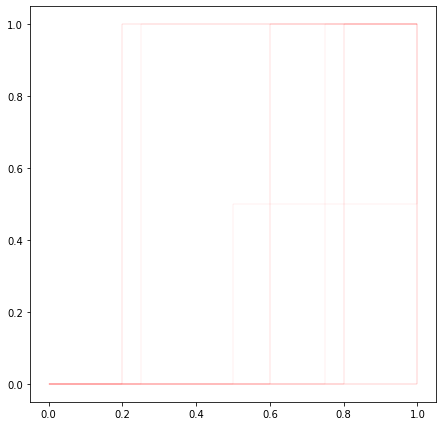

In [78]:
fig = plt.figure(figsize=(16,16))
fig.subplots_adjust(hspace=0.2, wspace=0.2)


ax = fig.add_subplot(2, 2, 1)
c1_mean_fpr, c1_mean_tpr, c1_mean_auc, c1_std_auc = logi_plot_roc(seriesA_x_train,seriesA_y_train,colors[0],show_detail=True)
label()
plt.title("Logi (Raw) Mean ROC")

ax = fig.add_subplot(2, 2, 2)
c2_mean_fpr, c2_mean_tpr, c2_mean_auc, c2_std_auc = logi_plot_roc(seriesA_x_train[p_seriesA],seriesA_y_train,colors[1],show_detail=True)
label()
plt.title("Logi (p-val) Mean ROC")

ax = fig.add_subplot(2, 2, 3)
c3_mean_fpr, c3_mean_tpr, c3_mean_auc, c3_std_auc = logi_plot_roc(seriesA_x_train[chi2_seriesA],seriesA_y_train,colors[2],show_detail=True)
label()
plt.title("Logi (chi2/f) Mean ROC")

ax = fig.add_subplot(2, 2, 4)
c4_mean_fpr, c4_mean_tpr, c4_mean_auc, c4_std_auc = logi_plot_roc(seriesA_x_train[mutual_seriesA],seriesA_y_train,colors[3],show_detail=True)
label()
plt.title("Logi (mutual info) Mean ROC")
plt.savefig('seriesA_4x.png')

plt.show()

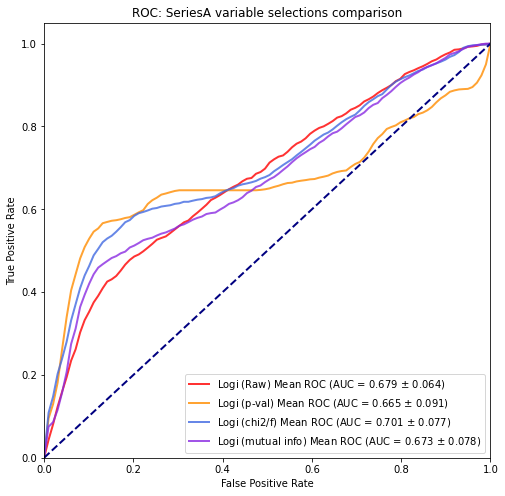

In [79]:
fig = plt.figure(figsize=(8,8))

plt.plot(c1_mean_fpr, c1_mean_tpr, color=colors[0], label="Logi (Raw)"+ r' Mean ROC (AUC = %0.3f $\pm$ %0.3f)' 
         % (c1_mean_auc, c1_std_auc), lw=2, alpha=0.8)
plt.plot(c2_mean_fpr, c2_mean_tpr, color=colors[1], label="Logi (p-val)"+ r' Mean ROC (AUC = %0.3f $\pm$ %0.3f)' 
         % (c2_mean_auc, c2_std_auc), lw=2, alpha=0.8)
plt.plot(c3_mean_fpr, c3_mean_tpr, color=colors[2], label="Logi (chi2/f)"+ r' Mean ROC (AUC = %0.3f $\pm$ %0.3f)' 
         % (c3_mean_auc, c3_std_auc), lw=2, alpha=0.8)
plt.plot(c4_mean_fpr, c4_mean_tpr, color=colors[3], label="Logi (mutual info)"+ r' Mean ROC (AUC = %0.3f $\pm$ %0.3f)' 
         % (c4_mean_auc, c4_std_auc), lw=2, alpha=0.8)

label()

plt.title("ROC: SeriesA variable selections comparison")
plt.savefig('seriesA_all.png')


plt.show()

In [72]:
test_results(seriesA_x_train[chi2_seriesA], seriesA_y_train, seriesA_x_test[chi2_seriesA], seriesA_y_test)

<ipython-input-63-6083ffdc5030>:8: RuntimeWarning: invalid value encountered in longlong_scalars
  tpr = cm[0][0]/np.sum(cm[0])


[0.6, nan, 0.6]

In [73]:
test_results(seriesA_x_train[mutual_seriesA], seriesA_y_train, seriesA_x_test[mutual_seriesA], seriesA_y_test)

<ipython-input-63-6083ffdc5030>:8: RuntimeWarning: invalid value encountered in longlong_scalars
  tpr = cm[0][0]/np.sum(cm[0])


[1.0, nan, 1.0]

In [74]:
data = [
    ["SeriesA Raw"] + test_results(seriesA_x_train, seriesA_y_train, seriesA_x_test, seriesA_y_test),
    ["SeriesA P-value"] + test_results(seriesA_x_train[p_seriesA], seriesA_y_train, seriesA_x_test[p_seriesA], seriesA_y_test),
    ["SeriesA Chi2/F"] + test_results(seriesA_x_train[chi2_seriesA], seriesA_y_train, seriesA_x_test[chi2_seriesA], seriesA_y_test),
    ["SeriesA Mutual"] + test_results(seriesA_x_train[mutual_seriesA], seriesA_y_train, seriesA_x_test[mutual_seriesA], seriesA_y_test)]
df = pd.DataFrame(data, columns = ['Method','Test Accuracy', 'TPR', "TNR"]) 
df

<ipython-input-63-6083ffdc5030>:8: RuntimeWarning: invalid value encountered in longlong_scalars
  tpr = cm[0][0]/np.sum(cm[0])
<ipython-input-63-6083ffdc5030>:8: RuntimeWarning: invalid value encountered in longlong_scalars
  tpr = cm[0][0]/np.sum(cm[0])
<ipython-input-63-6083ffdc5030>:8: RuntimeWarning: invalid value encountered in longlong_scalars
  tpr = cm[0][0]/np.sum(cm[0])
<ipython-input-63-6083ffdc5030>:8: RuntimeWarning: invalid value encountered in longlong_scalars
  tpr = cm[0][0]/np.sum(cm[0])


,Method,Test Accuracy,TPR,TNR
0,SeriesA Raw,0.4,NaN,0.4
1,SeriesA P-value,0.4,NaN,0.4
2,SeriesA Chi2/F,0.6,NaN,0.6
3,SeriesA Mutual,1.0,NaN,1.0


# Import new data, transform the columns for testing and make into predictable dataset.




###  Saving the model to transpose it onto our data set 

In [ ]:
import pickle 

# Save the trained model as a pickle string
saved_model = pickle.dumps()

#load the pickled model
Loaded_model = pickle.loads(saved_model)

#Use the loaded model to make predictions
Loaded_model.predict(TestingData)

In [88]:
working_df.drop('Unnamed: 0.1.1',axis = 1, inplace = True)


In [90]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1939 entries, 0 to 1938
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sr No                     1939 non-null   int64         
 1   Date dd/mm/yyyy           1939 non-null   datetime64[ns]
 2   Startup Name              1939 non-null   object        
 3   Industry Vertical         1939 non-null   object        
 4   SubVertical               1470 non-null   object        
 5   City  Location            1935 non-null   object        
 6   Investors Name            1919 non-null   object        
 7   InvestmentnType           1938 non-null   object        
 8   Amount in USD             1939 non-null   int64         
 9   TierBoolean               1939 non-null   bool          
 10  AmountInUSDBoolean        1939 non-null   bool          
 11  Year                      1939 non-null   int64         
 12  Month               

In [ ]:
working_df[]